In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import math
from scipy import stats

In [2]:
import os
print(os.listdir('.'))

['.ipynb_checkpoints', 'plot-idvgs.ipynb', 'T0022ALL.CSV', 'T0023ALL.CSV', 'T0024ALL.CSV', 'T0025ALL.CSV', 'T0026ALL.CSV', 'T0027ALL.CSV', 'T0028ALL.CSV', 'T0033ALL.CSV', 'T0034ALL.CSV', 'T0035ALL.CSV', 'T0036ALL.CSV', 'T0037ALL.CSV', 'T0038ALL.CSV', 'T0039ALL.CSV', 'T0040ALL.CSV']


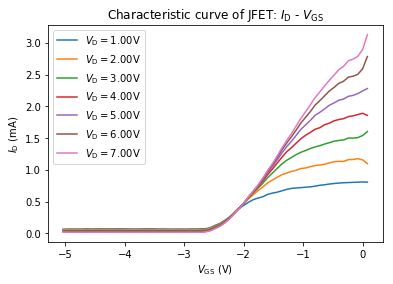

In [12]:
rd = 990
arr_vgs = list()
arr_eyed = list()
filelist = ['T0022ALL.CSV', 'T0023ALL.CSV', 'T0024ALL.CSV', 'T0025ALL.CSV', 'T0026ALL.CSV', 'T0027ALL.CSV', 'T0028ALL.CSV']
vdlabel = ['1.00', '2.00', '3.00', '4.00', '5.00', '6.00', '7.00']

for filename, label in zip(filelist, vdlabel):
    with open(filename, 'r') as f:
        for _ in range(16):
            f.readline()
        while True:
            try:
                _, vin, _, vds, _, vgs, _, vdd, _, _, _, mat = f.readline().strip().split(',')
                vin, vds, vgs, vdd, mat = map(float, [vin, vds, vgs, vdd, mat])
                eyed = (vdd - vds) / rd
                arr_vgs.append(vgs); arr_eyed.append(eyed)
            except:
                break

    temp = list(zip(arr_vgs, arr_eyed))
    G = {}
    for x, y in temp:
        try:
            G[x].append(y)
        except:
            G[x] = []
            G[x].append(y)

    x = list()
    y = list()
    for key, value in G.items():
        x.append(key)
        y.append(np.average(value))

    temp = list(zip(x, y))
    temp.sort(key=lambda x: x[0])
    x, y = np.transpose(temp)
    x = np.array(x)
    y = np.array(y) * 1000
    plt.plot(x, y, label='$V_{\mathrm{D}} = $%sV' % (label))

plt.xlabel('$V_{\mathrm{GS}}$ (V)')
plt.ylabel('$I_{\mathrm{D}}$ (mA)')
plt.title('Characteristic curve of JFET: $I_{\mathrm{D}}$ - $V_{\mathrm{GS}}$')
plt.legend(loc=0)
plt.savefig('idvgs.pdf')